In [23]:
import kagglehub
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maksim\.cache\kagglehub\datasets\faviovaz\marketing-ab-testing\versions\1


In [27]:
df = pd.read_csv(r'C:\Users\Maksim\Desktop\marketing_AB.csv').iloc[:, 1:]

In [28]:
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


#### Всего 2 тестируемых групп ad и psa

In [29]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

#### Если продукт был куплен то true иначе False

In [30]:
df['converted'].unique()

array([False,  True])

#### Разделение 2 датасета

In [31]:
df_ad = df[df['test group'] == 'ad']

In [32]:
df_psa = df[df['test group'] == 'psa']

#### В первой группе 564577 строчек

In [33]:
df_ad

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


#### Во второй группе 23524 строчки 

In [34]:
df_psa

,user id,test group,converted,total ads,most ads day,most ads hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19
...,...,...,...,...,...,...
588052,900959,psa,False,16,Tuesday,22
588063,902828,psa,False,3,Tuesday,22
588066,914578,psa,False,1,Tuesday,22
588069,909042,psa,False,6,Tuesday,22


#### Можно проанализировать эффективность рекламы по общему количество показов рекалмы по категорием и их конвертацию

#### Среднее количество показов рекламы для категории psa 

In [35]:
df_psa['total ads'].mean()

24.761137561639178

#### Среднее количество показов рекламы для категории ad

In [36]:
df_ad['total ads'].mean()

24.823365103431417

#### Среднее количество показов рекламы для категории psa и если продукт был куплен

In [37]:
df_psa.loc[df['converted'] == True, 'total ads'].mean()

83.27619047619048

#### Среднее количество показов рекламы для категории ad и если продукт был куплен

In [38]:
df_ad.loc[df['converted'] == True, 'total ads'].mean()

83.90556749635998

#### Несмотря на то что, количество записей у категории ad в разы больше, чем у категории psa. Средние значения практически одинаковое. Можно сделать первичный вывод, что тестируемая группа ad лучше, чем группа psa   

#### В двух выборках отсутствуют пропуски 

In [39]:
df_ad['total ads'].isna().sum()

0

In [40]:
df_psa['total ads'].isna().sum()

0

#### Распределение также в 2 выборках не нормальное. Графики ниже также это подтверждают 

In [41]:
stat, p_value = stats.shapiro(df_ad.loc[df_ad['converted'] == True, 'total ads'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 4.499334261406496e-98
Распределение не является нормальным.


C:\Users\Maksim\AppData\Local\Temp\ipykernel_48696\1710056189.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14423.
  stat, p_value = stats.shapiro(df_ad.loc[df_ad['converted'] == True, 'total ads'])


In [42]:
stat, p_value = stats.shapiro(df_psa.loc[df_psa['converted'] == True, 'total ads'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 3.032065659112192e-23
Распределение не является нормальным.


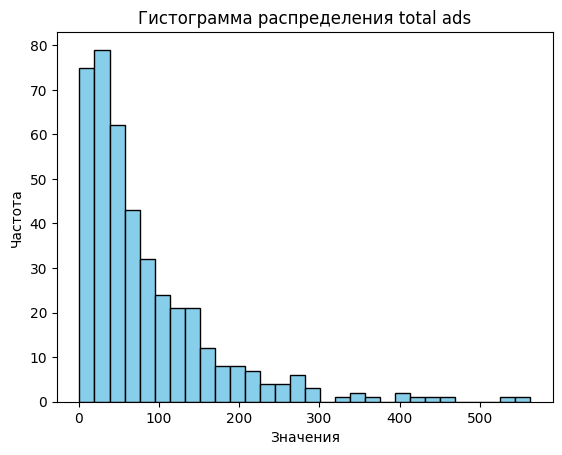

In [43]:

plt.hist(df_psa.loc[df_psa['converted'] == True, 'total ads'], bins=30, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения total ads")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

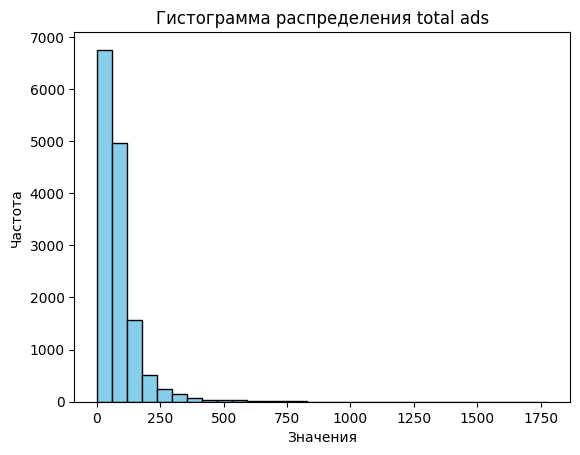

In [48]:

plt.hist(df_ad.loc[df_ad['converted'] == True, 'total ads'], bins=30, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения total ads")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

#### Критейри Манна-Уитни показал, что разница между двумя граппами статистически значима. 
#### Средние значения двух групп различаются неслучайно. 
#### Тестируемая группа ad, лучше, так как имеет более крупную выборку, что означает более надёжный результат. А также более высокое среднее значение и эт отличие статистически значимо

In [45]:
stats.mannwhitneyu(df_ad.loc[df_ad['converted'] == True, 'total ads'], df_psa.loc[df_psa['converted'] == True, 'total ads'])

MannwhitneyuResult(statistic=3214709.0, pvalue=0.03176570677836976)

In [46]:
len(df_psa)

23524

In [47]:
len(df_ad)

564577